In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

crimes1 = pd.read_csv('./input/Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crimes2 = pd.read_csv('./input/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes3 = pd.read_csv('./input/Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)
crimes = pd.concat([crimes1, crimes2, crimes3], ignore_index=False, axis=0)
crimes.head()

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [7]:
minLat = crimes['Latitude'].mean() - crimes['Latitude'].std()
maxLat = crimes['Latitude'].mean() + crimes['Latitude'].std()
minLon = crimes['Longitude'].mean() - crimes['Longitude'].std()
maxLon = crimes['Longitude'].mean() + crimes['Longitude'].std()
ndf = crimes[crimes['Latitude'] <= maxLat]
ndf = ndf[ndf['Latitude'] >= minLat]
ndf  = ndf[ndf['Longitude']<=maxLon]
ndf  = ndf[ndf['Longitude']>minLon]

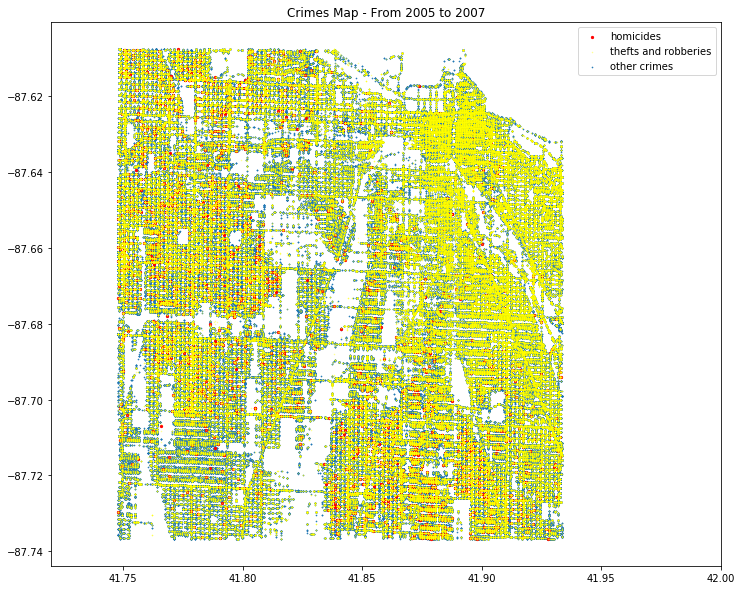

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

n3df = ndf[ndf['Year']>=2005]
nd3df = ndf[ndf['Year']<=2007]
nnhdf = n3df[(n3df['Primary Type']!= 'HOMICIDE') & 
            (n3df['Primary Type']!=  'THEFT') &
            (n3df['Primary Type']!= 'ROBBERY')]
nhdf = n3df[n3df['Primary Type']=='HOMICIDE']
ntdf = n3df[(n3df['Primary Type']=='THEFT')| 
           (n3df['Primary Type']=='ROBBERY')]

f,ax= plt.subplots(1,1,figsize=(12,10))
plt.xlim(41.72,42)
other = ax.scatter(nnhdf['Latitude'],nnhdf['Longitude'], s=0.4, alpha=1, label = 'other crimes')
homicides = ax.scatter(nhdf['Latitude'],nhdf['Longitude'], s=5, alpha=1,color='red', label='homicides')
tr = ax.scatter(ntdf['Latitude'],ntdf['Longitude'], s=0.3, alpha=0.4,color='yellow',label='thefts and robberies')
plt.title('Crimes Map - From 2005 to 2007')
lgnd = plt.legend(handles=[homicides, tr,other])

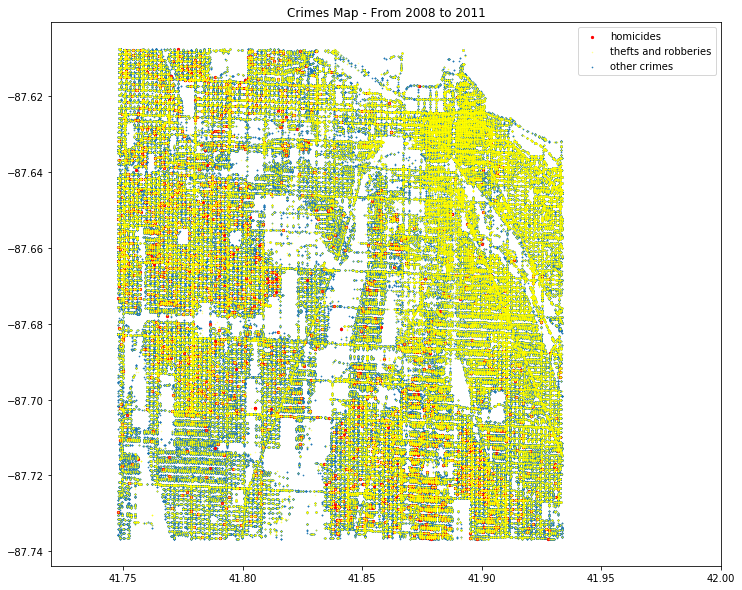

In [10]:
n3df = ndf[ndf['Year']>=2008]
nd3df = ndf[ndf['Year']<=2011]
nnhdf = n3df[(n3df['Primary Type']!= 'HOMICIDE') & 
            (n3df['Primary Type']!=  'THEFT') &
            (n3df['Primary Type']!= 'ROBBERY')]
nhdf = n3df[n3df['Primary Type']=='HOMICIDE']
ntdf = n3df[(n3df['Primary Type']=='THEFT')| 
           (n3df['Primary Type']=='ROBBERY')]

f,ax= plt.subplots(1,1,figsize=(12,10))
plt.xlim(41.72,42)
other = ax.scatter(nnhdf['Latitude'],nnhdf['Longitude'], s=0.4, alpha=1, label = 'other crimes')
homicides = ax.scatter(nhdf['Latitude'],nhdf['Longitude'], s=5, alpha=1,color='red', label='homicides')
tr = ax.scatter(ntdf['Latitude'],ntdf['Longitude'], s=0.3, alpha=0.4,color='yellow',label='thefts and robberies')
plt.title('Crimes Map - From 2008 to 2011')
lgnd = plt.legend(handles=[homicides, tr,other])

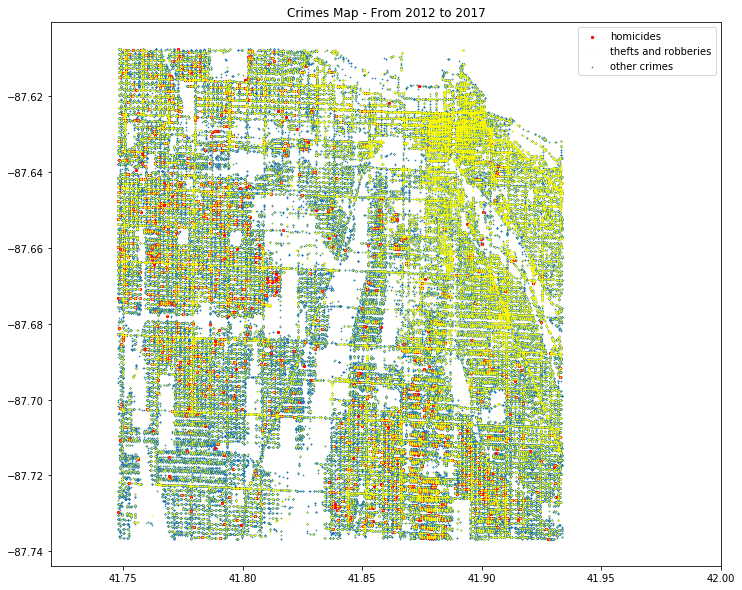

In [11]:
n3df = ndf[ndf['Year']>=2012]
nnhdf = n3df[(n3df['Primary Type']!= 'HOMICIDE') & 
            (n3df['Primary Type']!=  'THEFT') &
            (n3df['Primary Type']!= 'ROBBERY')]
nhdf = n3df[n3df['Primary Type']=='HOMICIDE']
ntdf = n3df[(n3df['Primary Type']=='THEFT')| 
           (n3df['Primary Type']=='ROBBERY')]

f,ax= plt.subplots(1,1,figsize=(12,10))
plt.xlim(41.72,42)
other = ax.scatter(nnhdf['Latitude'],nnhdf['Longitude'], s=0.4, alpha=1, label = 'other crimes')
homicides = ax.scatter(nhdf['Latitude'],nhdf['Longitude'], s=5, alpha=1,color='red', label='homicides')
tr = ax.scatter(ntdf['Latitude'],ntdf['Longitude'], s=0.3, alpha=0.4,color='yellow',label='thefts and robberies')
plt.title('Crimes Map - From 2012 to 2017')
lgnd = plt.legend(handles=[homicides, tr,other])